# Data Analysis & Visualization

In [19]:
import numpy as np
import pandas as pd
import scipy
import datetime
import seaborn as sns
import os
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud, STOPWORDS
from scipy.misc import imread
import imageio
%matplotlib inline

## Load data

In [20]:
df = pd.read_csv('cleaned_data.csv', index_col='Unnamed: 0')

In [21]:
# set year, month, quarter columns
df['year'] = df['time'].apply(lambda x: x[:4])
df['month'] = df['time'].apply(lambda x:x[5:7])
df['quarter'] = df['month'].apply(lambda x: (int(x)-1)//3+1)

In [22]:
# set year, month, quarter columns
df['year'] = df['time'].apply(lambda x: x[:4])
df['month'] = df['time'].apply(lambda x:x[5:7])
df['quarter'] = df['month'].apply(lambda x: (int(x)-1)//3+1)

## Basic Analysis

### Great films & Box office over year

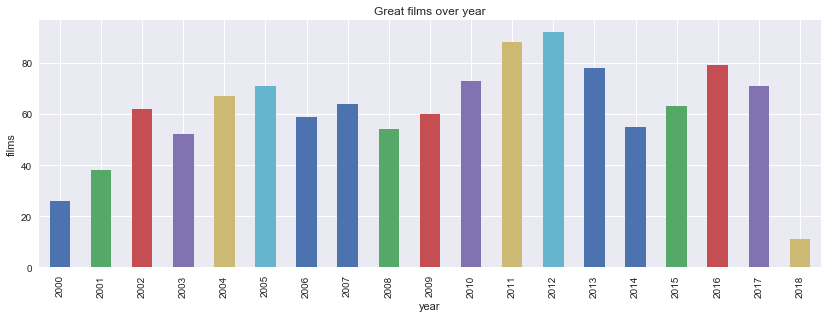

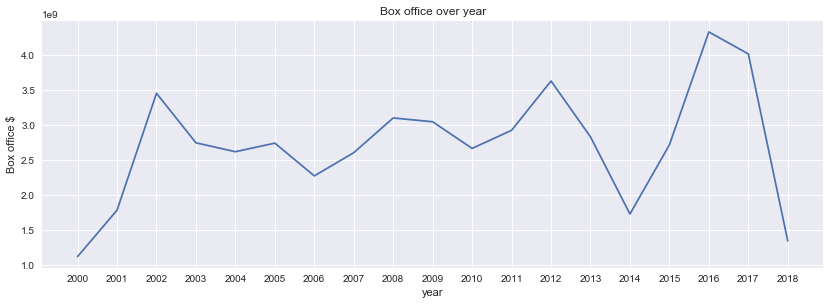

In [23]:
plt.style.use('seaborn')

plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
df.groupby(df['year']).size().plot(kind='bar')
plt.xlabel('year')
plt.ylabel('films')
plt.title('Great films over year')
plt.show()

plt.figure(figsize=(14,10))
plt.subplot(2,1,2)
plt.plot(df[['year','box_office']].groupby('year').sum())
plt.xlabel('year')
plt.ylabel('Box office $')
plt.title('Box office over year')
plt.show()

### genre trend of great movies

#### genre data processing

In [24]:
def get_columns(df_column):
    l = []
    for ele in df_column:
        if ele!='na' and ele!='nan':
            l.extend(ele.split(', '))

    return set([x[1:-1] for x in l])

genre_list = get_columns(df['genre'])
for ele in genre_list:
    df['genre_'+str(ele)]=np.where(df["genre"].str.contains(ele),1,0)

df['genre_Total'] = df['genre'].apply(lambda x: len(x.split(', ')))

#### genre wordcloud

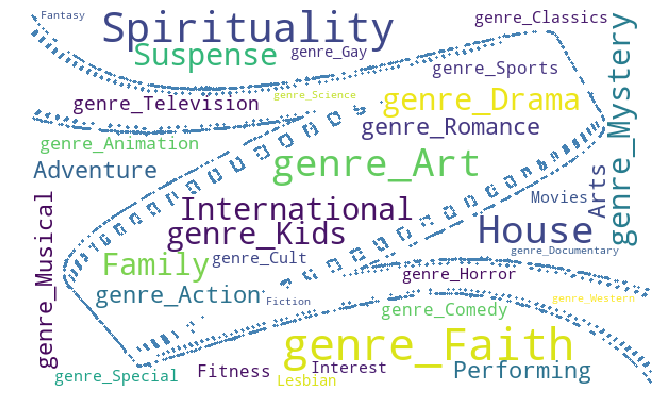

In [36]:
string = ' '.join(genre_list)
words=nltk.tokenize.word_tokenize(string)
origin_mask = imageio.imread("films.jpg")
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',mask=origin_mask, contour_width=3, 
               contour_color='steelblue').generate(' '.join(words))
plt.figure(figsize=(14,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Genre and box office distribution

In [26]:
genre_list = [str('genre_'+x) for x in genre_list]

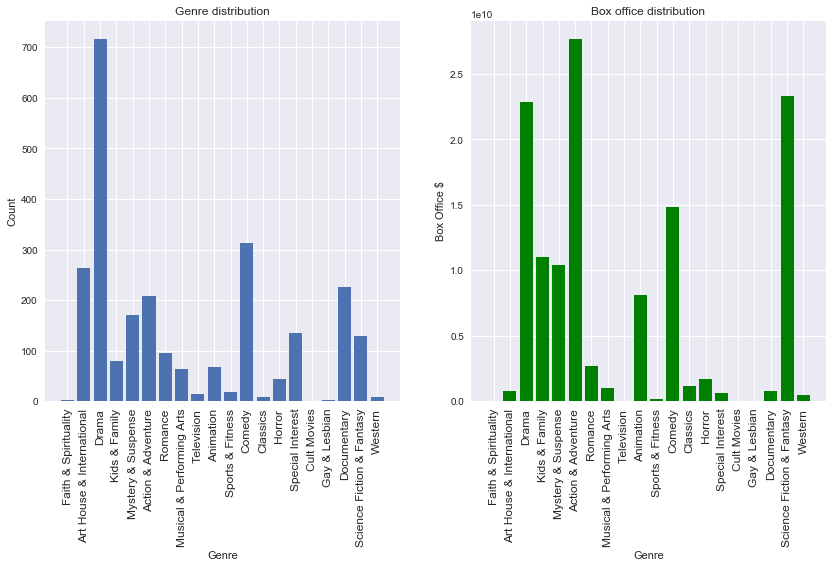

In [27]:
genre_count = {}
box_office = {}

for genre in genre_list:
    genre_count[genre[6:]] = len(df[df[genre]==1])
    box_office[genre[6:]] = sum(df[df[genre]==1]['box_office'])

plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.bar(genre_count.keys(),genre_count.values())
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre distribution')
plt.xticks(rotation=90,fontsize=12)

plt.subplot(1,2,2)
plt.bar(box_office.keys(),box_office.values(),color='G')
plt.xlabel('Genre')
plt.ylabel('Box Office $')
plt.title('Box office distribution')
plt.xticks(rotation=90,fontsize=12)

plt.show()

#### genre trend over year

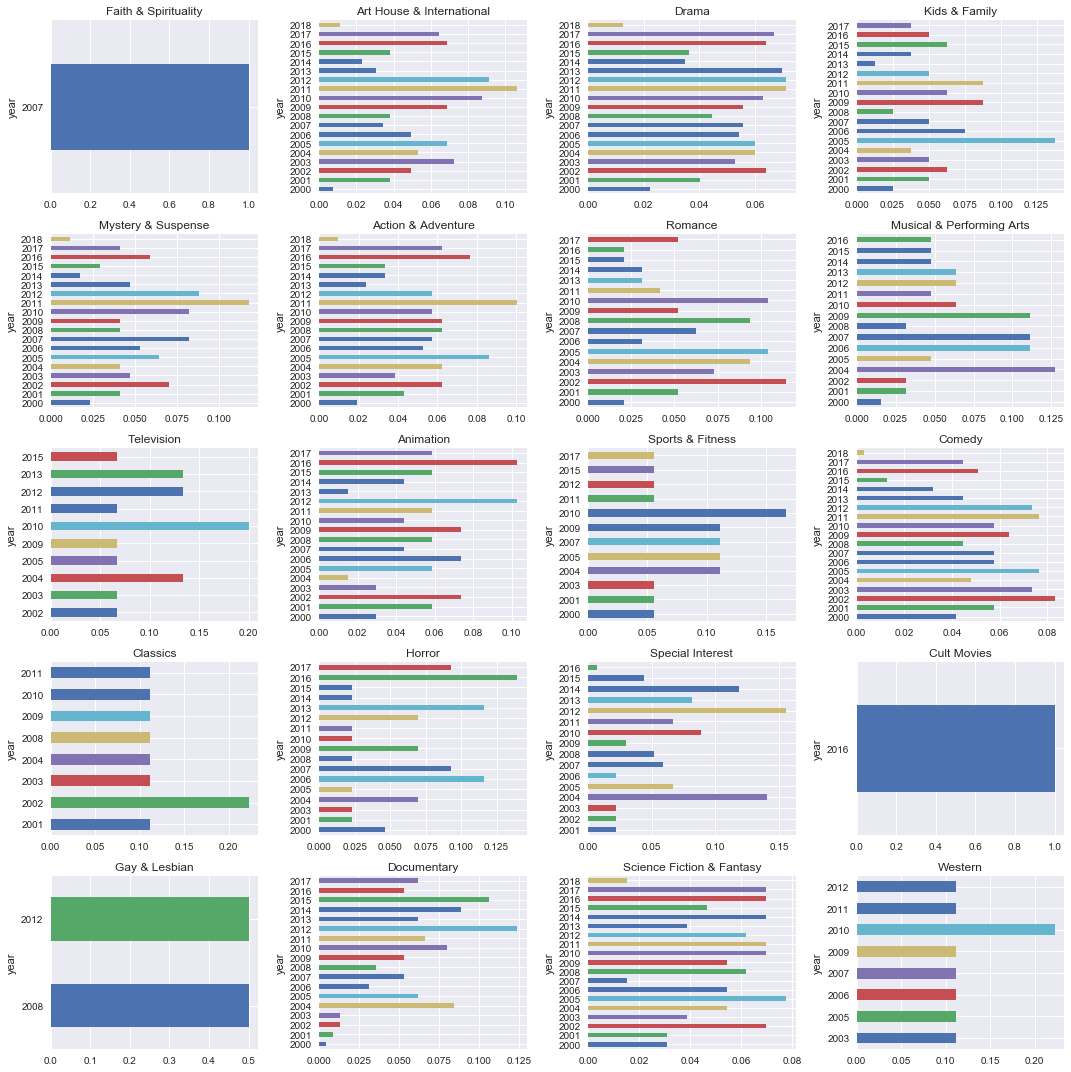

In [28]:
from matplotlib.ticker import FuncFormatter
COL_NUM = 4
ROW_NUM = 5
fig,axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(15,15))

for i, ele in enumerate(genre_list):
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    ele_trend_ratio = df[df[ele]==1].groupby(df['year']).size() / len(df[df[ele]==1])
    ele_trend_ratio.plot(kind='barh',ax=ax)
    ax.set_title(ele[6:])

plt.tight_layout() 

#### genre trend over quarter

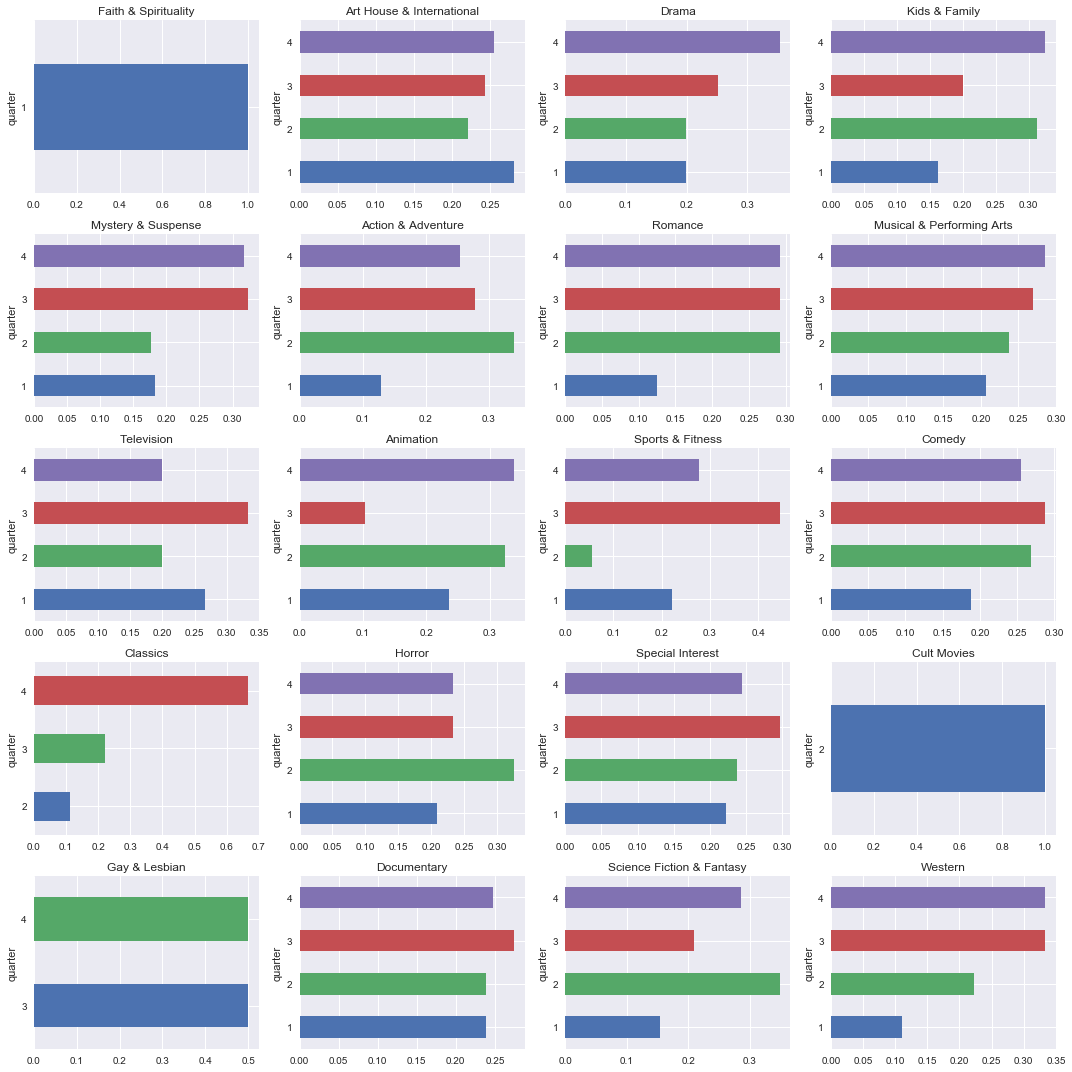

In [29]:
from matplotlib.ticker import FuncFormatter
COL_NUM = 4
ROW_NUM = 5
fig,axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(15,15))

for i, ele in enumerate(genre_list):
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    ele_trend_ratio = df[df[ele]==1].groupby(df['quarter']).size() / len(df[df[ele]==1])
    ele_trend_ratio.plot(kind='barh',ax=ax)
    ax.set_title(ele[6:])

plt.tight_layout() 

### Rating distribution

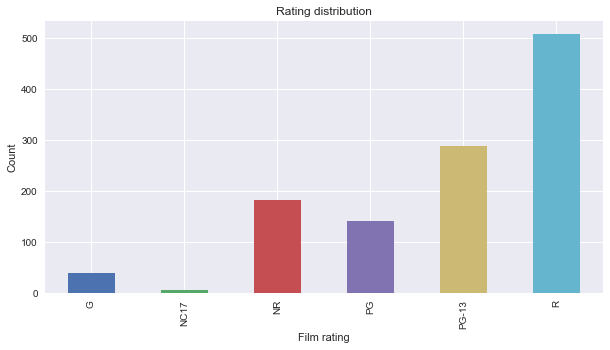

In [30]:
plt.figure(figsize=(10,5))
df.groupby(['rating']).size().plot(kind='bar')
plt.xlabel('Film rating')
plt.ylabel('Count')
plt.title('Rating distribution')
plt.show()

### Director explorations

#### Director data processing

In [16]:
dic = {}
for directors in df['director']:
    director_list = directors.split(', ')
    for director in director_list:
        dic[director] = dic.get(director,0)+1
dic = sorted(dic.items(),key=lambda x:x[1],reverse=True)

top_director = [x for x in dic if x[1]>=7]
print('Top Directors: ',top_director, '\n')
director_name = top_director[0][0][1:-1]
print('Number One Director: ',director_name)

Top Directors:  [("'Joel Coen'", 10), ("'Steven Soderbergh'", 8), ("'Christopher Nolan'", 7), ("'Jon Favreau'", 7), ("'Werner Herzog'", 7), ("'Steven Spielberg'", 7)] 

Number One Director:  Joel Coen


#### Brief look at top directors' preference on genre

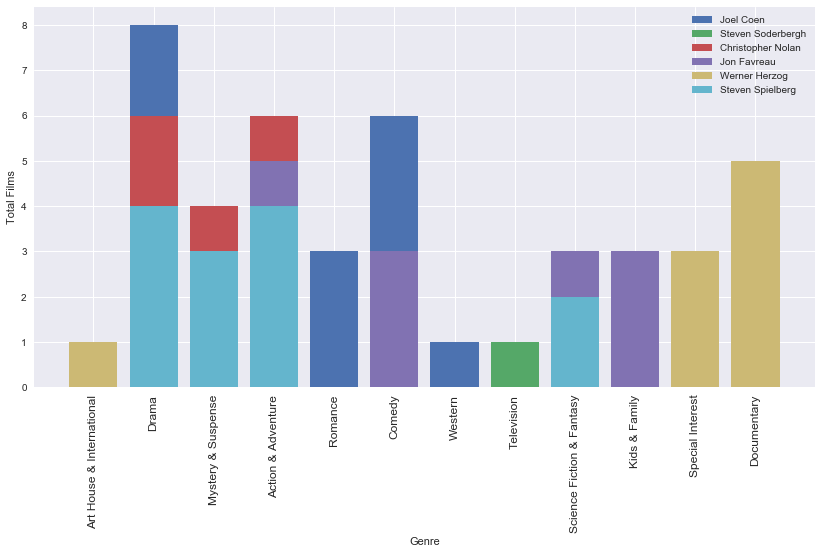

In [17]:
plt.figure(figsize=(14,7))
for director in top_director:
    sub_df = df[[director[0] in directors for directors in [ele.split(', ') for ele in df['director']]]]
    record = {}
    for genre in genre_list:
        count = sum(sub_df[genre_list][genre])
        if count>0:
            record[genre[6:]]=count
    plt.bar(record.keys(),record.values(),label=director[0][1:-1])

plt.legend(loc='upper right')
plt.xlabel('Genre')
plt.ylabel('Total Films')
plt.xticks(rotation=90,fontsize=12)
plt.show()

#### Look closer into director 'Joel Choen'

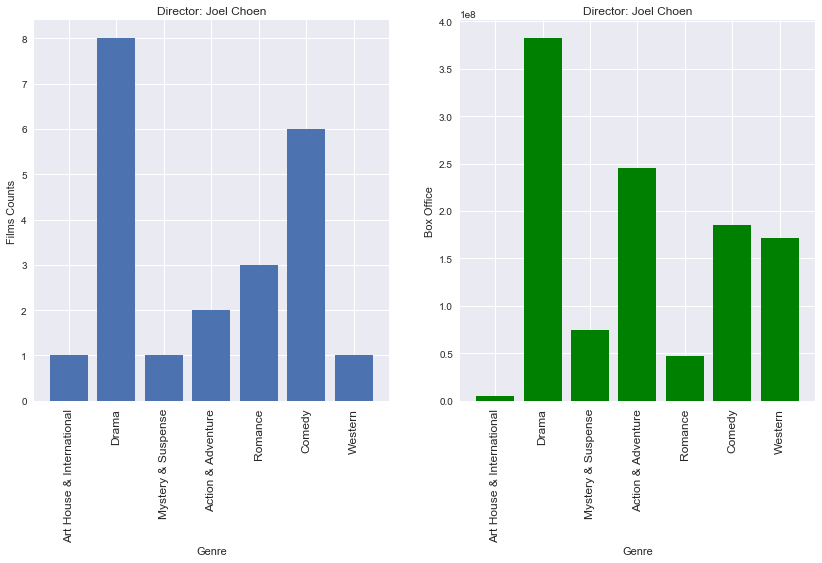

In [18]:
df_JC = df[["'Joel Coen'" in directors for directors in [ele.split(', ') for ele in df['director']]]]

record = {}
box_office = {}
for genre in genre_list:
    count = sum(df_JC[genre_list][genre])
    if count>0:
        record[genre[6:]] = count
        box_office[genre[6:]] = sum(df_JC[df_JC[genre]==1]['box_office'])

plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.bar(record.keys(),record.values())
plt.xlabel('Genre')
plt.ylabel('Films Counts')
plt.title('Director: Joel Choen')
plt.xticks(rotation=90,fontsize=12)

plt.subplot(1,2,2)
plt.bar(box_office.keys(),box_office.values(),color='G')
plt.xlabel('Genre')
plt.ylabel('Box Office')
plt.title('Director: Joel Choen')
plt.xticks(rotation=90,fontsize=12)

plt.show()

# Text Mining

# Machine Learning & Word Embedding for Box Office Prediction.ipynb

## generate dummy variables & collect features

### Import Packages and load data

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("cleaned_data.csv",index_col='Unnamed: 0')

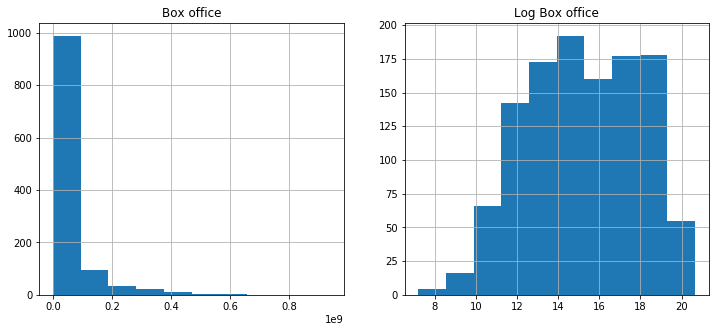

In [3]:
# using log(box office) for prediction
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df['box_office'].hist()
plt.title('Box office')

plt.subplot(1,2,2)
np.log(df['box_office']).hist()
plt.title('Log Box office')

plt.show()

### generate dummy variables

In [4]:
# generate dummy variables for rating column
raw_data = pd.concat([df,pd.get_dummies(df['rating'],prefix = 'rating')],axis=1)

In [5]:
# generate dummy variables for studio column
def get_columns(df_column):
    l = []
    for ele in df_column:
        if ele!='na' and ele!='nan':
            l.extend(ele.split(', '))

    return set([x[1:-1] for x in l])

studio_list = get_columns(raw_data['studio'])
for ele in studio_list:
    raw_data['studio_'+str(ele).strip()]=np.where(raw_data["studio"].str.contains(ele),1,0)

In [6]:
# generate dummy variables for genre column
genre_list = get_columns(df['genre'])
for ele in genre_list:
    raw_data['genre_'+str(ele)]=np.where(df["genre"].str.contains(ele),1,0)

### Caculate days from the earliest movies

Intuition: Later movies are expected to have larger box office

In [7]:
# generate 'days_to_000401' column
earliest_date = datetime.strptime(raw_data['time'].min(),"%Y-%m-%d")
print('Earliest date in data:', earliest_date)

temp_list = []
for i in range(len(raw_data)):
    temp_list.append((datetime.strptime(raw_data.iloc[i]['time'],"%Y-%m-%d")-earliest_date).days)
raw_data['days_to_000401'] = temp_list

Earliest date in data: 2000-04-01 00:00:00


### Drop columns

In [8]:
cleaned_date = raw_data.drop(['meter_score','audience_score','name','rating','genre','cast', 'director', 'time','studio'],axis=1)

### Train, validation and test split

In [9]:
from sklearn.model_selection import train_test_split

Y = np.log(cleaned_date['box_office'])
X = cleaned_date.drop(['box_office'],axis=1)
train_X, VT_X, train_Y, VT_Y = train_test_split(X,Y,test_size=0.2)
validation_X, test_X, validation_Y, test_Y = train_test_split(VT_X,VT_Y,test_size=0.5)
train_X.shape,validation_X.shape,test_X.shape,train_Y.shape,validation_Y.shape,test_Y.shape

((930, 374), (116, 374), (117, 374), (930,), (116,), (117,))

## Word Embedding

In [10]:
from gensim.models import Word2Vec
from nltk import tokenize
from nltk import word_tokenize

### Embedding model

In [11]:
corpus = []
for ele in train_X['movie_synopsis']:
    s = ele.lower()
    corpus.append(word_tokenize(s)) 

In [12]:
model = Word2Vec(corpus,size=100, window=5, min_count=1, workers=4)

### Transform train/validation/test data

In [13]:
def transform(x):
    vectors = []
    for ele in x:
        words = word_tokenize(ele.lower())
        total = 0
        vector = np.array([0]*100)
        for ele1 in words:
            try:
                vector = vector+model.wv[ele1]
                total += 1
            except:
                pass
        vector = vector/total*10
        vectors.append(vector)
    return vectors

In [14]:
# transform training data
word_embedding = pd.DataFrame(transform(train_X['movie_synopsis']),index=train_X.index)
train_X_we = train_X.join(word_embedding)
train_X_we.shape

(930, 474)

In [15]:
train_X_we.head()

,runtime,movie_synopsis,rating_G,rating_NC17,rating_NR,rating_PG,rating_PG-13,rating_R,studio_Village Roadshow',studio_'The Weinstein Company',...,90,91,92,93,94,95,96,97,98,99
1331,94,Flipping back and forth between the 18th centu...,0,0,0,0,0,1,0,0,...,2.337236,5.248883,1.364524,3.724325,11.596282,9.646227,-6.932783,1.411255,-1.431612,-16.268013
286,117,Matthew McConaughey stars in DALLAS BUYERS CLU...,0,0,0,0,0,1,0,0,...,2.253053,5.209550,1.290010,3.645523,11.455240,9.543464,-6.859856,1.372840,-1.338830,-16.039709
1663,112,Mild-mannered scientist Bruce Banner has been ...,0,0,0,0,1,0,0,0,...,2.389326,5.463634,1.360492,3.845735,12.053989,10.014504,-7.200775,1.458218,-1.432942,-16.856186
1095,87,A family struggles to go on after a devastatin...,0,0,0,0,0,1,0,0,...,2.505030,5.899346,1.367577,4.085153,12.964632,10.759757,-7.736104,1.479191,-1.415573,-18.027786
689,127,HIDDEN FIGURES is the incredible untold story ...,0,0,0,1,0,0,0,0,...,2.073546,5.022348,1.144095,3.412106,10.967946,9.179683,-6.553510,1.146452,-1.091280,-15.224534


In [16]:
# transform validation data
word_embedding = pd.DataFrame(transform(validation_X['movie_synopsis']),index=validation_X.index)
validation_X_we = validation_X.join(word_embedding)

# transform test data
word_embedding = pd.DataFrame(transform(test_X['movie_synopsis']),index=test_X.index)
test_X_we = test_X.join(word_embedding)

### Drop 'movie_synopsis' and rename

In [17]:
train_X = train_X_we.drop('movie_synopsis',axis=1)
validation_X = validation_X_we.drop('movie_synopsis',axis=1)
test_X = test_X_we.drop('movie_synopsis',axis=1)
train_X.shape,validation_X.shape,test_X.shape
del model

## Benchmark model: Linear Regression

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [32]:
OLS_model = LinearRegression()
OLS_model.fit(train_X,train_Y)
print('MSE on training set:', mean_squared_error(OLS_model.predict(train_X),train_Y))
print('MSE on validation set:',mean_squared_error(OLS_model.predict(validation_X),validation_Y))

MSE on training set: 1.0836231700981958
MSE on validation set: 3.702405009145883


## Random Forest and XGBoost

### Feature Selection: Lasso

In [20]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [21]:
Lasso_model = Lasso(alpha=0.0002,max_iter=1000000)
Lasso_model.fit(train_X,train_Y)
# train_X.columns[(Lasso_model.coef_==0)][-100:]

Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=1000000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
(Lasso_model.coef_==0).sum()

140

In [23]:
drop_list = train_X.columns[(Lasso_model.coef_==0)]
train_X = train_X.drop(drop_list,axis=1)
validation_X = validation_X.drop(drop_list,axis=1)
test_X = test_X.drop(drop_list,axis=1)
train_X.shape[1]

333

### Random Forest

In [24]:
selection_model = GridSearchCV(RandomForestRegressor(),
                             {'n_estimators':[80,160,320],'max_features':[15,30,60,120,200],'max_depth':[3,5,8,16,None]},
                             cv=5)
%time selection_model.fit(train_X,train_Y)
selection_model.best_estimator_

CPU times: user 4min 20s, sys: 3.16 s, total: 4min 23s
Wall time: 4min 36s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features=120, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=320, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [26]:
best_rf_model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features=120, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=320, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
best_rf_model.fit(train_X,train_Y)

print('MSE on training set:', mean_squared_error(best_rf_model.predict(train_X),train_Y))
print('MSE on validation set:',mean_squared_error(best_rf_model.predict(validation_X),validation_Y))

MSE on training set: 0.4163763531748863
MSE on validation set: 3.6782307866461825


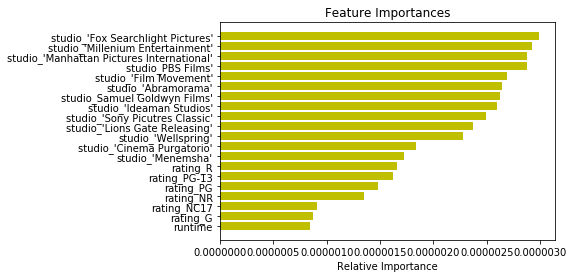

In [27]:
feature_names = [i for i in train_X.columns]
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(20), importances[indices][0:20], color='y', align='center')
plt.yticks(range(20),feature_names[0:20])
plt.xlabel('Relative Importance')
plt.show()

### XGBoost

In [28]:
from xgboost import XGBRegressor

In [29]:
XGB_selection_model = GridSearchCV(XGBRegressor(),
                                 {'min_child_weight':[0.25,0.5,1,2,4],'colsample_bytree':[0.5,0.6,0.7,0.8,0.9,1],
                                  'max_depth':[3,5,7,9]},
                                 cv=5)
%time XGB_selection_model.fit(train_X,train_Y)
XGB_selection_model.best_estimator_

CPU times: user 7min 46s, sys: 6.25 s, total: 7min 52s
Wall time: 8min 15s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=4, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [30]:
best_XGB = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=4, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
best_XGB.fit(train_X,train_Y)
mean_squared_error(best_XGB.predict(train_X),train_Y)

print('MSE on training set:', mean_squared_error(best_XGB.predict(train_X),train_Y))
print('MSE on validation set:',mean_squared_error(best_XGB.predict(validation_X),validation_Y))

MSE on training set: 1.6225634876564121
MSE on validation set: 3.551087928879539


## Prediction for Box office

### model selection

According to validation data
- mean square error of Linear Regression:  3.702405009145883 
- mean square error of Random Forest:  3.6782307866461825
- mean square error of XGBoost:  3.551087928879539

Therefore Random Forest will be chosen for prediction.

In [31]:
final_train_X = pd.concat([train_X,validation_X])
final_train_Y = pd.concat([train_Y,validation_Y])
best_XGB.fit(final_train_X,final_train_Y)
mean_squared_error(best_XGB.predict(test_X),test_Y)

2.291005589375202

### Predict Box Office

The example input for model is illstrated as follows 

- First, the raw input should be cleaned by the preprocessing ipynb file (actor_score and director_score could be calculated in that file)
- Next, the cleaned input should be processed by the ML & WE prediction ipynb file, and will be ready for the model

In [33]:
# example input after data preprocessing
df.iloc[:1]

,name,meter_score,audience_score,rating,genre,cast,director,time,studio,runtime,box_office,movie_synopsis
0,Toy Story 3,98,89,G,"['Animation', 'Comedy', 'Kids & Family', 'Scie...","['Tom Hanks', 'Tim Allen', 'Joan Cusack', 'Ned...",['Lee Unkrich'],2010-06-18,['Walt Disney Pictures'],103,414984497.0,"""Toy Story 3"" welcomes Woody, Buzz and the who..."


In [34]:
# example input for model prediction
train_X[:1]

,runtime,rating_G,rating_NC17,rating_NR,rating_PG,rating_PG-13,rating_R,studio_'Menemsha',studio_'Cinema Purgatorio',studio_'Wellspring',...,41,45,53,64,66,75,79,80,81,88
1331,94,0,0,0,0,0,1,0,0,0,...,3.127892,1.489561,1.540268,-10.764084,3.885459,-4.385925,-16.398596,0.031341,-3.953347,9.97593


In [75]:
# example prediction by XGBoost model
log_box_office = best_XGB.predict(test_X.iloc[1:2])
box_office = np.exp(log_box_office)
print('predicted box office:\t', box_office[0])
print("real box office:\t",np.exp(test_Y.iloc[1:2]).values[0])

predicted box office:	 1063724.4
real box office:	 1324335.0000000005


In [72]:
np.exp(test_Y.iloc[1:2])

1443    1324335.0
Name: box_office, dtype: float64